## HW 3 - João Lazzaro

This is HW 3 code and answers. Note that I am using 500 points for assets to calculate the distribution and policy functions, this is slow, the results are essentially the same if 100 or 80 points are used. I'm using discrete grids and no kind of interpolation.

In [17]:
include("functions.jl")
using  LinearAlgebra, Plots
using  JLD2,FileIO


#Defining Parameters:
β = 0.98 #Discount rate
μ = 1.5  #Elasticity of intertemporal substitution
η = 0.3 #Utility parameter
τy = 0.4 #Income tax
ρ = 0.6 #autocorrelation
σ = 0.3 #Variance
δ = 0.075 #Depreciation rate
θ = 0.3 #Capital Share
T=0.1 #Transfers
G = 0.2 #Expenses Government
Z=19.12048323273413#productivity level used to calibrate Y = 1

fast = false #Used to get the policy functions faster, assuming we know the equilibrium r and w

amin = -0.0   #Debt limit
amax= 13.0 #capital limit

nE = 5 #Number of states for e
nA = 500#states for assets


500

Initial Guess for interest and wage:

In [3]:
r= (1/β - 1)-0.0001 #initial guess for r liens in the interval (-δ, 1/β-1)

Kguess = ((r+δ)/(Z*θ))^(1/(θ-1))#K for the nitial guess of r
w=  (1-θ)*Z*Kguess^θ  #Initial wage given r0
Nguess = (w/(Z*(1-θ)))^(-1/θ)*Kguess

1.0

Get the grid for E and assets. Note that in this code, I only use grids. No interpolation, therefore it is inefficient and slow, but I fully understand what is going on. I'll make it better once I understand the full algorithm.

In [18]:
#Defining grids

pdfE,E = Tauchen(ρ,σ,nE)    #E comes from Tauchen method
A = range(amin,stop = amax, length = nA) #Assets

0.0:0.026052104208416832:13.0

Get the policy functions and distribution, see the file functions.jl where I defined the ayiagari function:

In [19]:
λ,r,w, policy_a, policy_c, policy_l,Assets,N,Y,B,K = ayiagary(A,E,r,w,τy,T,β,η,μ,Z,G,fast)

Iteration: 1, r is: 0.020408163265306145, w is: 65.22112775919584
Iteration: 2, r is: 0.020408163265306145, w is: 65.10284664203006
Iteration: 3, r is: 0.020408163265306145, w is: 65.01300030736627
Iteration: 4, r is: 0.020408163265306145, w is: 64.95564757088388
Iteration: 5, r is: 0.020408163265306145, w is: 64.90632947739722
Iteration: 6, r is: 0.020408163265306145, w is: 64.8715786417801
Iteration: 7, r is: 0.020408163265306145, w is: 64.85651985840045
Iteration: 8, r is: 0.020408163265306145, w is: 64.84099828656048
Iteration: 9, r is: 0.020408163265306145, w is: 64.8276169575856
Iteration: 10, r is: 0.020408163265306145, w is: 64.81950315090745
Iteration: 11, r is: 0.020408163265306145, w is: 64.80545879017836
Iteration: 12, r is: 0.020408163265306145, w is: 64.80202716059348
Iteration: 13, r is: 0.020408163265306145, w is: 64.79734998257655
Iteration: 14, r is: 0.020408163265306145, w is: 64.79483927245565
Iteration: 15, r is: 0.020408163265306145, w is: 64.79346479745274
Iterat

([0.00289465 0.000127096 … 0.0 0.0], 0.020408163265306145, 64.79264034459973, [1 1 … 7 29; 1 1 … 8 29; … ; 480 480 … 480 494; 481 481 … 481 495], [0.1 0.1 … 0.329057 0.503064; 0.126371 0.126371 … 0.329153 0.510976; … ; 0.753855 0.753855 … 0.753855 0.808639; 0.754174 0.754174 … 0.754174 0.808735], [1.0 1.0 … 0.665817 0.508952; 1.0 1.0 … 0.666011 0.516956; … ; 1.0 1.0 … 1.0 0.818104; 1.0 1.0 … 1.0 0.818201], 2.044597296764773, 0.010610045377186137, 0.9820754933753958, 0.008431507586352529, 2.036165789178421)

The consumption policy function is plotted below:

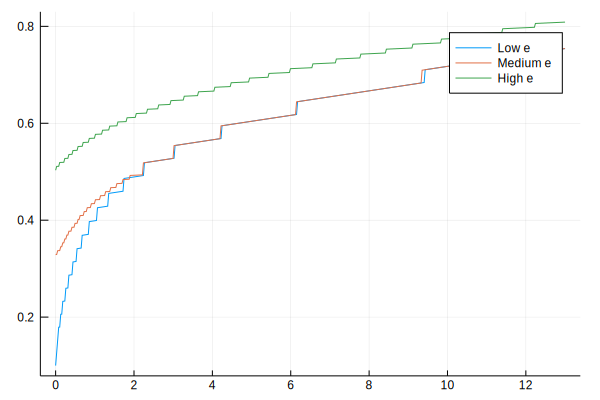

In [20]:
plot(A,[policy_c[:,2] policy_c[:,4] policy_c[:,5]], labels = ["Low e" "Medium e" "High e"])

The assets policy function is plotted below:

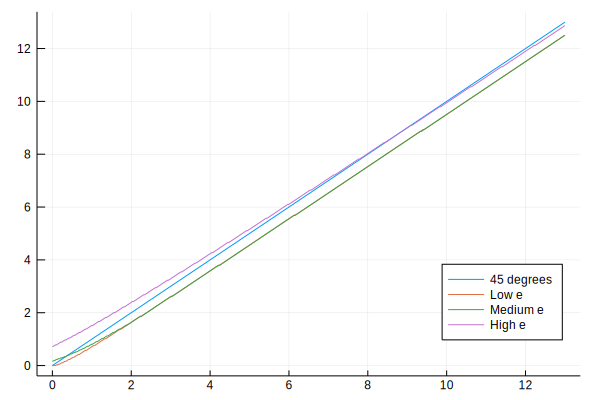

In [21]:
plot(A,[A,A[policy_a[:,2]],A[policy_a[:,4]],A[policy_a[:,5]]], labels = ["45 degrees" "Low e" "Medium e" "High e"],legend = :bottomright )

The assets distribution is below:

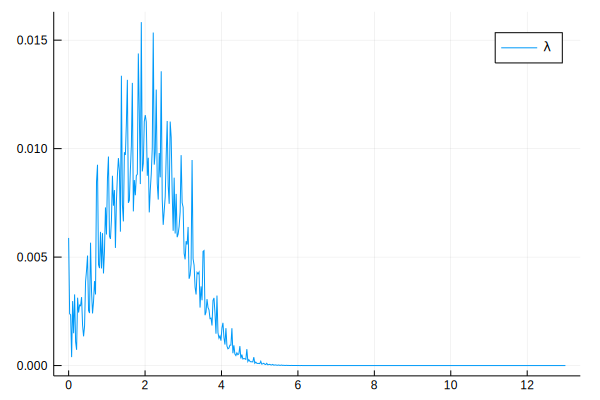

In [22]:
#reshaping λ so it gets in a format easier to plot
λ1 = ones(nA,nE)
i=0
for a=1:nA
    global i
    for e=1:nE
        i+=1
        λ1[a,e] = λ[i]
    end
end

plot(A, sum(λ1,dims=2) , label = "\\lambda")

The lorenz curve is plotted below:

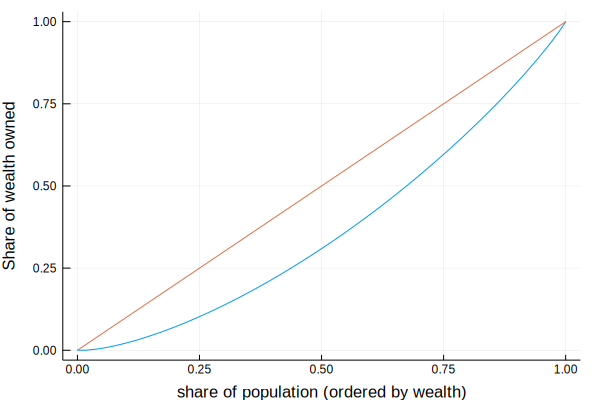

In [50]:
#All the formula for Lorez curve and Gini index were taken from wikipedia:
#https://en.wikipedia.org/wiki/Gini_coefficient
#https://en.wikipedia.org/wiki/Lorenz_curve
F = zeros(nA+1)
S = zeros(nA+1)
mean_wealth = 0
gini = 0
for e=2:nA+1
    global F,S,mean_wealth,gini
        F[e] = F[e-1] + sum(λ1[e-1,:])
        S[e] = S[e-1] + sum(λ1[e-1,:])*A[e-1]
        mean_wealth += A[e-1]*sum(λ1[e-1,:])
        for e1 = 1:nA
            gini += sum(λ1[e-1,:])*sum(λ1[e1,:])*abs(A[e-1]-A[e1])
        end
end
gini = 1/(2*mean_wealth) * gini
L = S./S[end]
var_wealth = 0
for a=1:nA
    global var_wealth
    var_wealth += sum(λ1[a,:])*(A[a]-mean_wealth)^2
end
std_wealth = sqrt(var_wealth)
plot(F,[L,F],legend = false, xaxis="share of population (ordered by wealth)",yaxis = "Share of wealth owned")

The statistics are summarized in the table below, we also did the exercise for $\tau_y=0.2$, keeping all the other parameters constant.

\begin{array}{rr} \hline
& Y & A & K & B & N & r & w & \sigma_A & Gini \\ \hline
\tau_y = 0.4 & 0.98            & 2.044       & 2.0361       & 0.008       & 0.0106       & 0.0204       & 64.6         & 0.96                   & 0.267         \\
\tau_y = 0.2 & 1.22         & 3.93         & 3.82         & 0.114        & 0.0111       & 0.0166       & 78.8         & 1.77                & 0.255         \\ \hline
\end{array}

The baseline model misses key points of the data, because its debt to GDP ratio was not set to match US figures. The government in this model reduces inequality since it taxes proportionally more those agents with higher efficiency and also with higher assets and gives back to all agents the same amount of transfers. Therefore, we observe an increase in inequality when we taxes are lowered. 

The government needs to finance the same amount of expenses and thus will need to borrow more. An increase in debt (everything else equal) would normally be associated with an increase in interest rates, but in this case lower taxes also mean that the agents will have more available income and will save more. Assets level will be higher and also capital will be higher driving interest rates lower offsetting the increase in debt effect. Labor and GDP are also higher.